# IMDB Movie Dataset Analysis

This Jupyter notebook performs an exploratory data analysis (EDA) on the IMDB Top 1000 movie dataset. We will use **pandas** for data manipulation and **Matplotlib** and **Seaborn** for visualizations. The goal is to explore the dataset, clean and preprocess it, and create informative plots that reveal insights about movie ratings, genres, directors, and star power.

The dataset contains the following columns (among others):

- `Series_Title`: Title of the movie
- `Released_Year`: Year the movie was released
- `Certificate`: Film certification (e.g., PG‑13)
- `Runtime`: Duration of the movie (e.g., "142 min")
- `Genre`: Genre(s) of the movie (comma‑separated)
- `IMDB_Rating`: Rating on IMDb
- `Meta_score`: Metacritic score
- `Director`: Director of the movie
- `Star1`, `Star2`, `Star3`, `Star4`: Top billed stars
- `No_of_Votes`: Number of IMDb votes
- `Gross`: Gross earnings (in USD)

We will follow these steps:

1. Load and inspect the data
2. Preprocess the data: handle missing values and convert data types
3. Visualize rating trends over the years
4. Analyze genre popularity
5. Examine the impact of directors on movie ratings
6. Analyze star power using pair plots
7. Visualize rating distributions across genres
8. Create a correlation heatmap of numeric features


In [1]:

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set up plotting style for seaborn
sns.set(style='whitegrid')
%matplotlib inline


In [2]:
# Load the IMDB dataset
# Ensure the CSV file is in the same directory as this notebook or provide the correct path
file_path = 'imdb_top_1000.csv'
df = pd.read_csv(file_path)

# Display the first few rows and basic information about the dataset
display(df.head())
print('Dataset shape:', df.shape)
print('Data types:', df.dtypes)


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


Dataset shape: (1000, 16)
Data types: Poster_Link       object
Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
dtype: object


In [3]:

# Make a copy of the dataframe to avoid modifying the original data
movies = df.copy()

# Convert Released_Year to numeric (coerce errors to NaN)
movies['Released_Year'] = pd.to_numeric(movies['Released_Year'], errors='coerce')

# Convert Runtime from "XXX min" to numeric minutes
movies['Runtime'] = movies['Runtime'].str.replace(' min','', regex=False)
movies['Runtime'] = pd.to_numeric(movies['Runtime'], errors='coerce')

# Clean Gross by removing commas and converting to numeric
movies['Gross'] = movies['Gross'].str.replace(',','', regex=False)
movies['Gross'] = pd.to_numeric(movies['Gross'], errors='coerce')

# Convert Meta_score to numeric (may contain NaN)
movies['Meta_score'] = pd.to_numeric(movies['Meta_score'], errors='coerce')

# Some numeric columns may still have missing values. We will fill them with median values.
numeric_cols = ['Released_Year', 'Runtime', 'Gross', 'Meta_score']
for col in numeric_cols:
    median_val = movies[col].median()
    movies[col].fillna(median_val, inplace=True)

# Drop rows where IMDB_Rating is missing, as ratings are essential for our analysis
movies.dropna(subset=['IMDB_Rating'], inplace=True)

# Display basic statistics after preprocessing
movies.describe(include='all')


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
count,1000,1000,1000.000000,899,1000.000000,1000,1000.000000,1000,1000.000000,1000,1000,1000,1000,1000,1.000000e+03,1.000000e+03
unique,1000,999,NaN,16,NaN,202,NaN,1000,NaN,548,660,841,891,939,NaN,NaN
top,https://m.media-amazon.com/images/M/MV5BMDFkYT...,Drishyam,NaN,U,NaN,Drama,NaN,Two imprisoned men bond over a number of years...,NaN,Alfred Hitchcock,Tom Hanks,Emma Watson,Rupert Grint,Michael Caine,NaN,NaN
freq,1,2,NaN,234,NaN,85,NaN,1,NaN,14,12,7,5,4,NaN,NaN
mean,NaN,NaN,1991.225000,NaN,122.891000,NaN,7.949300,NaN,78.133000,NaN,NaN,NaN,NaN,NaN,2.736929e+05,6.051360e+07
std,NaN,NaN,23.286662,NaN,28.093671,NaN,0.275491,NaN,11.368225,NaN,NaN,NaN,NaN,NaN,3.273727e+05,1.014192e+08
min,NaN,NaN,1920.000000,NaN,45.000000,NaN,7.600000,NaN,28.000000,NaN,NaN,NaN,NaN,NaN,2.508800e+04,1.305000e+03
25%,NaN,NaN,1976.000000,NaN,103.000000,NaN,7.700000,NaN,72.000000,NaN,NaN,NaN,NaN,NaN,5.552625e+04,5.012919e+06
50%,NaN,NaN,1999.000000,NaN,119.000000,NaN,7.900000,NaN,79.000000,NaN,NaN,NaN,NaN,NaN,1.385485e+05,2.353089e+07
75%,NaN,NaN,2009.000000,NaN,137.000000,NaN,8.100000,NaN,85.250000,NaN,NaN,NaN,NaN,NaN,3.741612e+05,6.153989e+07


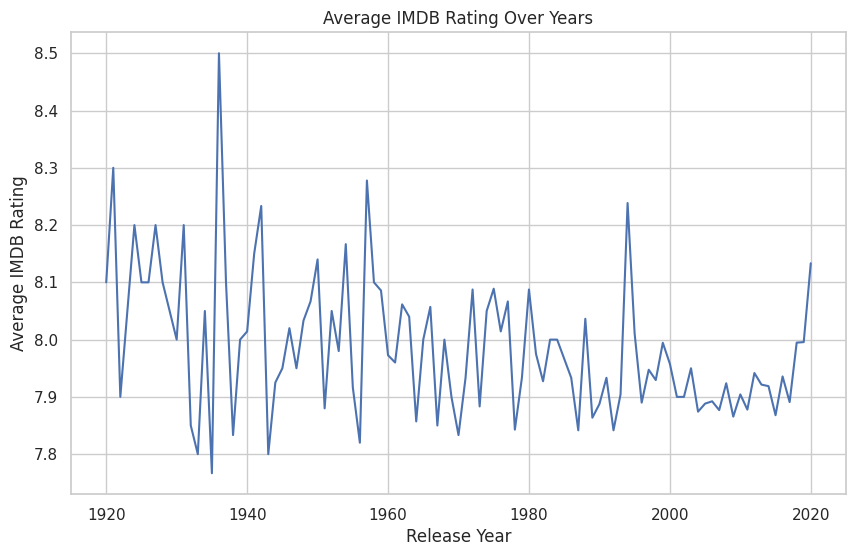

In [4]:

# Calculate average IMDB rating by year
rating_by_year = movies.groupby('Released_Year')['IMDB_Rating'].mean().reset_index()

# Plot the rating trends over the years
plt.figure(figsize=(10,6))
plt.plot(rating_by_year['Released_Year'], rating_by_year['IMDB_Rating'])
plt.title('Average IMDB Rating Over Years')
plt.xlabel('Release Year')
plt.ylabel('Average IMDB Rating')
plt.grid(True)
plt.show()


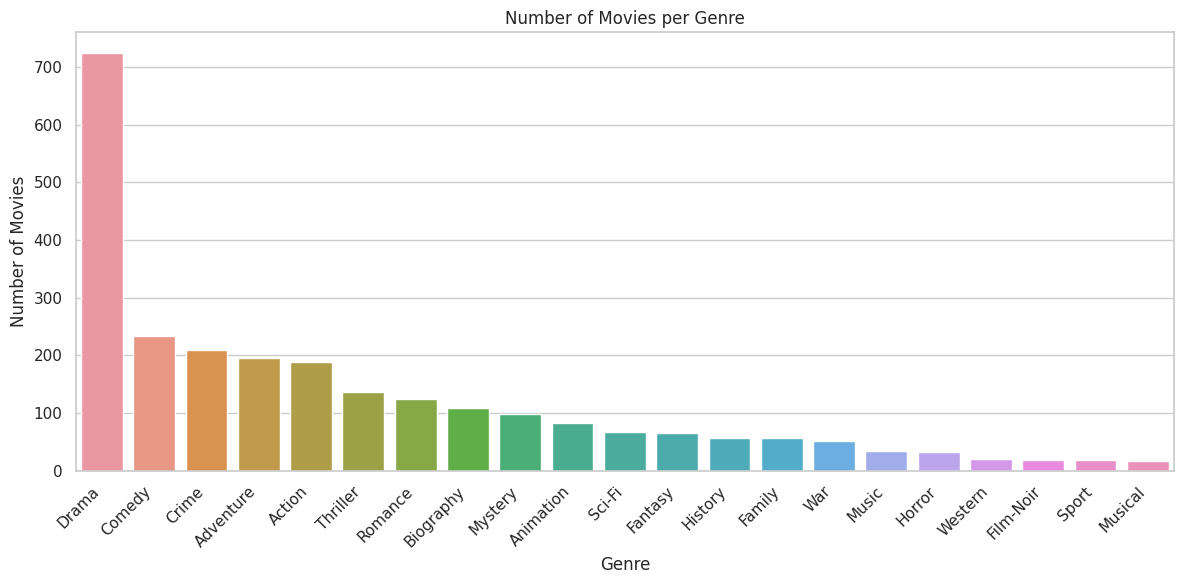

In [5]:

# Split multiple genres and explode into separate rows for counting
movies_genre = movies[['Series_Title','Genre']].copy()
movies_genre['Genre'] = movies_genre['Genre'].str.split(', ')
movies_genre = movies_genre.explode('Genre')

# Count the number of movies in each genre
genre_counts = movies_genre['Genre'].value_counts().reset_index()
genre_counts.columns = ['Genre','Count']

# Plot genre popularity
plt.figure(figsize=(12,6))
sns.barplot(x='Genre', y='Count', data=genre_counts)
plt.title('Number of Movies per Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


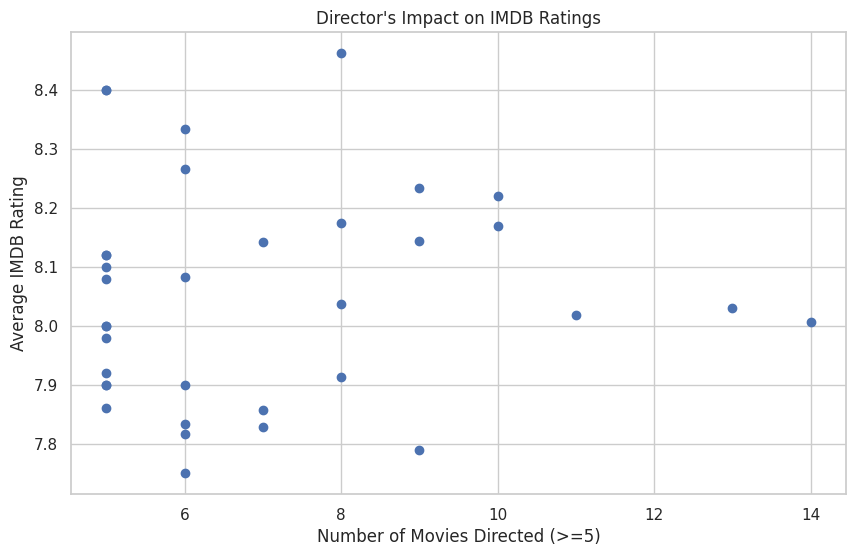

In [6]:

# Compute average rating and movie count per director
director_stats = movies.groupby('Director').agg(
    Average_Rating=('IMDB_Rating','mean'),
    Movie_Count=('IMDB_Rating','size')
).reset_index()

# Filter directors with at least 5 movies to reduce noise
director_stats_filtered = director_stats[director_stats['Movie_Count'] >= 5]

# Scatter plot of directors' average rating vs number of movies
plt.figure(figsize=(10,6))
plt.scatter(director_stats_filtered['Movie_Count'], director_stats_filtered['Average_Rating'])
plt.title("Director's Impact on IMDB Ratings")
plt.xlabel('Number of Movies Directed (>=5)')
plt.ylabel('Average IMDB Rating')
plt.grid(True)
plt.show()


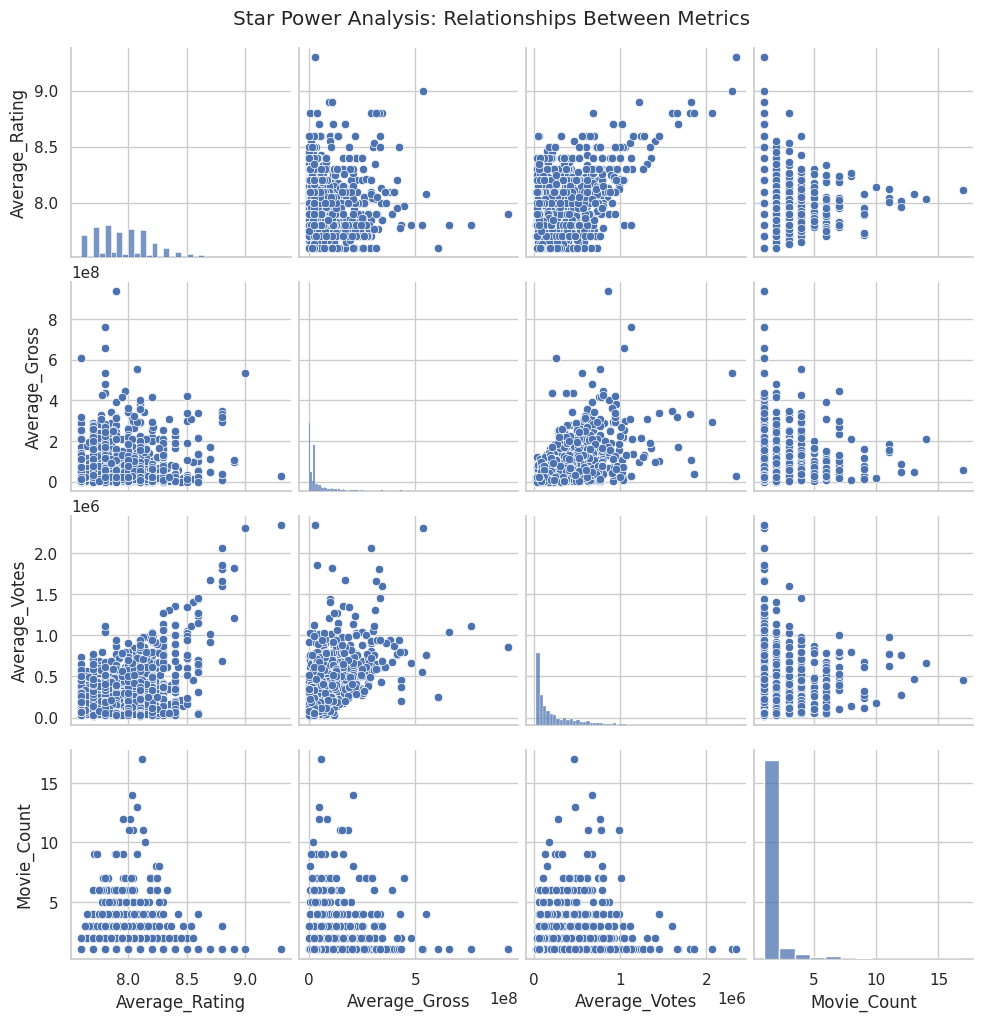

In [7]:

# Analyze stars by melting star columns and calculating metrics
star_cols = ['Star1','Star2','Star3','Star4']

# Melt the dataframe to have one star per row
stars_melt = movies[['IMDB_Rating','Gross','No_of_Votes'] + star_cols].melt(
    id_vars=['IMDB_Rating','Gross','No_of_Votes'], value_vars=star_cols, value_name='Star'
)

# Drop rows with missing star names
stars_melt = stars_melt.dropna(subset=['Star'])

# Compute star-level statistics
star_stats = stars_melt.groupby('Star').agg(
    Average_Rating=('IMDB_Rating','mean'),
    Average_Gross=('Gross','mean'),
    Average_Votes=('No_of_Votes','mean'),
    Movie_Count=('IMDB_Rating','size')
).reset_index()

# Use a pairplot to explore relationships between star metrics
sns.pairplot(star_stats[['Average_Rating','Average_Gross','Average_Votes','Movie_Count']])
plt.suptitle('Star Power Analysis: Relationships Between Metrics', y=1.02)
plt.show()


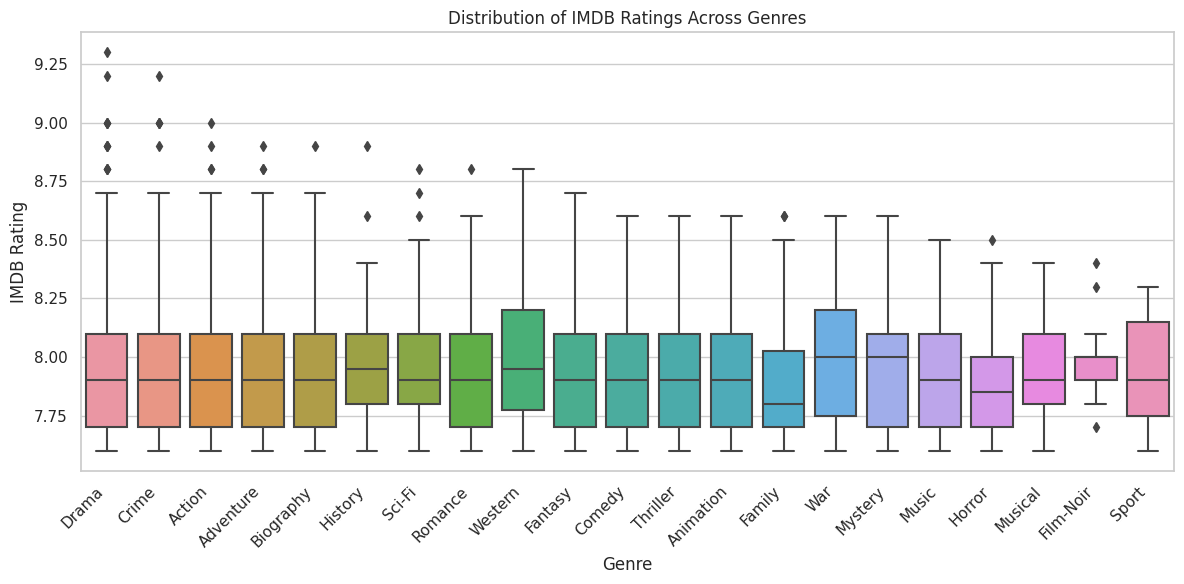

In [8]:

# Prepare data for box plot: explode genres
movies_box = movies[['IMDB_Rating','Genre']].copy()
movies_box['Genre'] = movies_box['Genre'].str.split(', ')
movies_box = movies_box.explode('Genre')

# Plot boxplot of ratings by genre
plt.figure(figsize=(12,6))
sns.boxplot(x='Genre', y='IMDB_Rating', data=movies_box)
plt.title('Distribution of IMDB Ratings Across Genres')
plt.xlabel('Genre')
plt.ylabel('IMDB Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


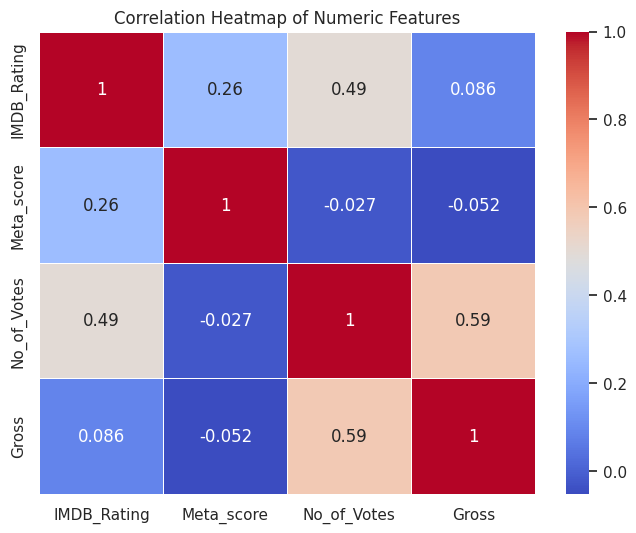

In [9]:

# Select numeric columns for correlation
corr_cols = ['IMDB_Rating','Meta_score','No_of_Votes','Gross']

# Compute correlation matrix
corr_matrix = movies[corr_cols].corr()

# Plot the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


## Conclusions

From this analysis of the IMDB Top 1000 movies dataset, we can draw several insights:

- **Rating Trends:** Average IMDB ratings remain relatively consistent across the years, though there may be slight fluctuations that could be explored further by focusing on specific time periods.
- **Genre Popularity:** Certain genres such as Drama and Comedy appear frequently in the dataset, reflecting their prevalence in top-rated movies. Genres like Western or Film‑Noir have fewer entries.
- **Directors:** There is not a strong simple relationship between the number of movies a director has made (in this dataset) and their average IMDB rating, though some directors with many movies maintain high average ratings.
- **Star Power:** The pair plot of star metrics allows us to visually assess whether stars who appear more often tend to have higher average ratings, grosses, or vote counts. Further analysis could focus on specific stars of interest.
- **Genre Ratings:** Box plots show that some genres have a wider spread of ratings than others. For example, Drama and Romance may have more variability compared to Action or Sci‑Fi.
- **Correlations:** Numerical features like IMDB rating and Meta score show a positive correlation, as expected. Votes and gross earnings are also correlated, indicating that more popular movies (higher votes) tend to earn more.

These visualizations provide an overview of the dataset and can guide deeper analysis, such as examining specific directors, stars, or time periods in detail.
